## This notebook simulates a flock of birds using the Boid model

#### create the dataset in pytorch format
Positions: (rollout steps ahead, number of boids, 2)
ex: (100 frames, 20 boids, 2 dimensions)

Species: a list of num_boid entries of each boid’s identity, (number of boids)
ex: ['goose', 'goose', 'crane', 'crane', 'crane']

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from torch_geometric.data import Data, Batch, DataLoader
import torch

In [29]:
# our code
from animal_simulation import AnimalTrajectoryDataset, visualize_graph
from boid import update_boids, init_multi_species_boids, update_boids_with_food

In [101]:
width = 640
height = 480
species_configs = { # different spieces should have a different set of values for all the parameters
                    # but the parameter name should all be the same for one updating algorithms.
                    
    "A": {"visual_range":50, "centering_factor":0.005,
          "min_distance":15, "avoid_factor":0.05,
          "matching_factor":0.5, #0.1, 0.5
          "margin":5, #0.05, 25
          "turn_factor":10,
          "speed_limit":20,
          "perching_time":15, #specific to bird with food
          "food_factor": 0.05,
          "perching": 1,
          "counts": 20,
          "food":{"x":width/3, "y":0}},
}

dataset = AnimalTrajectoryDataset(init_multi_species_boids, update_boids_with_food,
                              species_configs,
                              width=width, height=height,
                              steps=1000, num_samples=2,
                              seed = 2025
                              )

file_name = 'boid_food_basic_alignment.pt'
config_name = 'boid_food_basic_alignment_config.pt'
torch.save(dataset, '/workspace/collab-environment/collab_env/data/boids/' + file_name)
torch.save(species_configs, '/workspace/collab-environment/collab_env/data/boids/' + config_name)

In [35]:
#%debug

### A bit faster flying bird

In [ ]:
velocity_scale = 30

dataset = AnimalTrajectoryDataset(init_multi_species_boids, update_boids,
                              species_configs,
                              width=640, height=480,
                              steps=1000, num_samples=50,
                              velocity_scale = velocity_scale,
                              seed = 2026
                              ) # 50 videos of 1000 frames (5 steps advanced forward) each

torch.save(dataset, 'simulated_data/boid_single_species_high_cluster_high_speed.pt')
torch.save(species_configs, 'simulated_data/boid_single_species_high_cluster_high_speed_config.pt')

### Noisy birds

In [ ]:
species_configs["A"]["matching_factor"] = 0.1


dataset = AnimalTrajectoryDataset(init_multi_species_boids, update_boids,
                              species_configs,
                              width=640, height=480,
                              steps=1000, num_samples=50,
                              seed = 2025
                              )
torch.save(dataset, 'simulated_data/boid_single_species_noisy.pt')
torch.save(species_configs, 'simulated_data/boid_single_species_noisy_config.pt')


### Plot data

In [102]:
dataset = torch.load('/workspace/collab-environment/collab_env/data/boids/boid_food_basic_alignment.pt',
                     weights_only = False)
species_configs = torch.load('/workspace/collab-environment/collab_env/data/boids/boid_food_basic_alignment_config.pt',
                     weights_only = False)

In [103]:
batch_size = 1
loader = DataLoader(dataset, batch_size = batch_size, shuffle=False)

batch = next(iter(loader))
p, species = batch

print("made", str(len(list(loader))), "batches, each of size",  str(batch_size))# 
print("Positions:", p.shape)      # [B, steps, N, 2]
print("Species labels:", species.shape)   # [B, N]
print("\n")

made 2 batches, each of size 1
Positions: torch.Size([1, 1000, 20, 2])
Species labels: torch.Size([1, 20])




### Visualize boids

In [104]:
import matplotlib.pyplot as plt

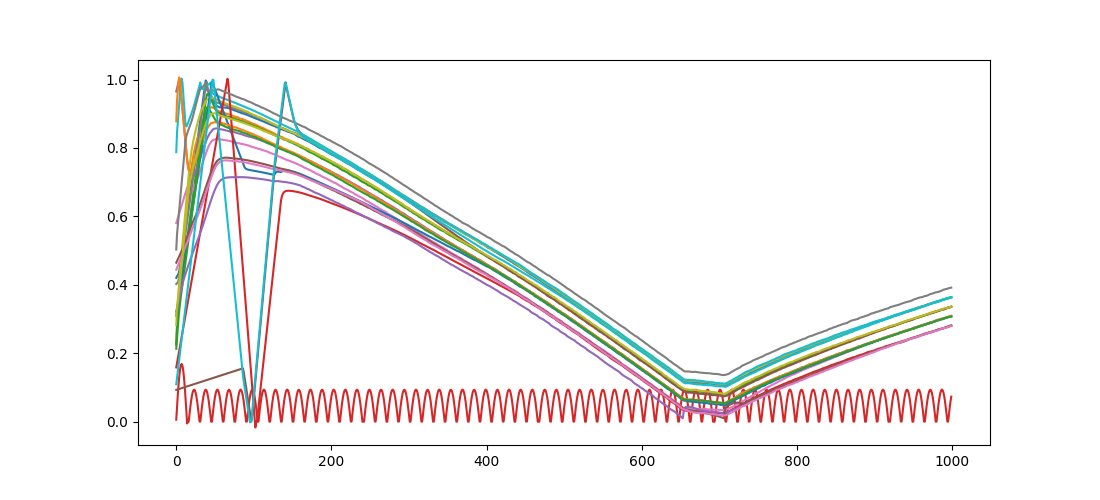

In [105]:
fig, axes = plt.subplots(1,1,figsize=(11, 5))
for b_ind in range(20):
    axes.plot(p[0,:,b_ind,1])

p0 shape torch.Size([20, 2])
p shape torch.Size([999, 20, 2])


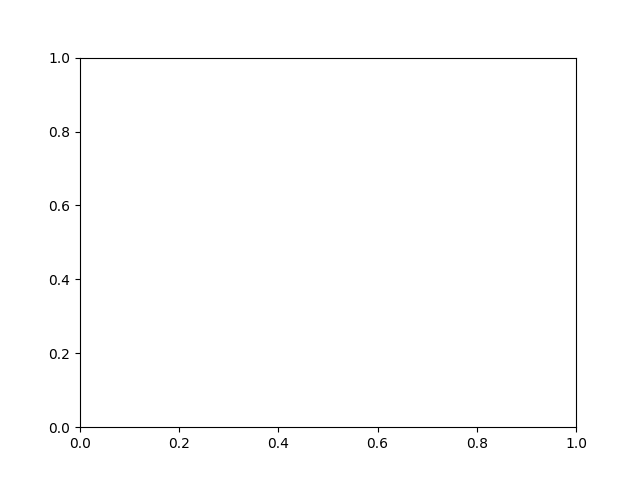

In [106]:
%matplotlib widget
global ani

file_id = 1
batch = list(iter(loader))[file_id]
p, species = batch
v = torch.diff(p, axis = 1) 

_, F, _2, dim = p.shape
starting_frame = int(round(3*F/4))
ani = visualize_graph(p[0,1:], v[0], None, 0, file_id = 0)

In [17]:
# To do: simulate more noisy data.

torch.Size([1, 1000, 20, 2])